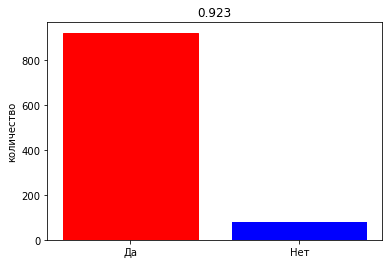

In [3]:
import scipy.stats as stats
from matplotlib import pyplot
import itertools
import numpy as np

M = 0
D = 1

def ttest(a , b):
    se = np.sqrt( a['SD']**2/a['N'] + b['SD']**2/b['N']  )
    t = (a['Mx'] - b['Mx'])/se
    dfreedom = a['N'] + b['N'] - 2
    return stats.t.sf(np.abs(t), dfreedom)*2

# n - элементов в выборке
# m - количество выборок
# a -  вероятность
def false_alarm(m, n, a):
    trys = 1000 # количество экспериментов
    hist = {'Да':0, 'Нет':0} # результаты сравнений     
    data = list(range(m)) # инициализация групп с выборками
    
    # запускаем trys экспериментов
    for i in range(trys):
        
        # наполняем m выборок, для ускорения сразу их агрегируем по SD, Mx, N
        for j in range(m):
            dt = stats.norm.rvs(loc=M, scale=D, size=n)
            data[j] = {'SD':np.std(dt, ddof = 1), 'Mx':np.mean(dt), 'N':n}
        
        #сравниваем выборки по 2 группы, перебор можно реализовать с помощью двух циклов или воспользоваться itertools
        for first, second in itertools.combinations(data, 2):
            if ttest(first, second) <= a:
                hist['Да']+=1
                break
        else:
            hist['Нет']+=1

    # рисуем гитограмму частот
    barlist = pyplot.bar(hist.keys(), hist.values(), color='b')
    barlist[0].set_color('r')
    pyplot.title(round(hist['Да'] / trys,3))
    pyplot.ylabel('количество')
    pyplot.show()
    
 # Изменяем число выборок
 # Поправка Браферони m*(m-1)/2=b
 # a/b=c
false_alarm(20,30,0.05)